In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

df_m = pd.read_excel('./microwave_reviews.xltx')

Setup Complete


In [2]:
frames=['marketplace','customer_id','review_id','product_parent']
df_m = df_m.drop(columns=frames)
index = df_m[(df_m['verified_purchase']=='N') | (df_m['verified_purchase']=='n')].index
df_m.drop(index, inplace=True)
index3 = df_m[(df_m['total_votes']==0) | (df_m['helpful_votes'] / df_m['total_votes'] < 0.5)].index
df_m = df_m.drop(index3)

In [4]:
df_m.head(2)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity
9,B007V7G5TU,danby 0.7 cu.ft. countertop microwave,Major Appliances,2,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015,0.235714,0.45119
12,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,5,1,1,N,Y,Five Stars,Love this microwave! Gives me more space in m...,8/27/2015,0.562500,0.55000


In [7]:
df_m['star_rating'] = df_m['star_rating'].apply(lambda x: x/5)

In [8]:
df_m.head(10)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity
9,B007V7G5TU,danby 0.7 cu.ft. countertop microwave,Major Appliances,0.4,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015,0.235714,0.451190
12,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,1.0,1,1,N,Y,Five Stars,Love this microwave! Gives me more space in m...,8/27/2015,0.562500,0.550000
15,B00NXRHIO8,samsung counter top microwave,Major Appliances,1.0,1,1,N,Y,... for about a week and so far it's been grea...,Had this for about a week and so far it's been...,8/25/2015,0.298667,0.804667
16,B00NQFSSWS,samsung counter top microwave,Major Appliances,0.2,5,7,N,Y,I only got to use the grill feature once and i...,the microwave turntable and light would come b...,8/25/2015,0.094444,0.495370
17,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,1.0,1,2,N,Y,This is a funny story.,This is a funny story....years ago my husband ...,8/24/2015,0.244346,0.596881
25,B004ZU09QQ,danby 0.7 cu.ft. countertop microwave,Major Appliances,0.6,1,2,N,Y,Danby 1.1 cuft microwave good unit,Unit is lighter than expected. Cooks as expect...,8/21/2015,-0.024479,0.479167
26,B00NG0FP7E,lg over-the-range microwave oven with 300 cfm ...,Major Appliances,1.0,1,2,N,Y,Five Stars,Extremly satisfied,8/21/2015,0.500000,1.000000
31,B005GSZB3M,whirlpool wmc20005yb 0.5 cu. ft. black counter...,Major Appliances,1.0,2,2,N,Y,Truckers Mucrowave,Perfect for semi truck at 750 watts can run on...,8/20/2015,1.000000,1.000000
32,B0052G51AQ,danby 0.7 cu.ft. countertop microwave,Major Appliances,0.8,47,53,N,Y,Gap on the top right,"I just received mine and, when it's running, y...",8/19/2015,0.122917,0.637847
39,B005GSZB7I,"whirlpool stainless look countertop microwave,...",Major Appliances,1.0,3,3,N,Y,The fabuous whirlpool mini!,I had found a small blue cube micro wave some ...,8/18/2015,0.171875,0.432639


In [11]:
def get_score(x):
    return x['star_rating']*0.3 + x['polarity']*0.7
df_m['score'] = df_m.apply(get_score, axis=1)

In [39]:
df_m['date1'] = pd.to_datetime(df_m['review_date'])
df_m['date2'] = df_m['date1'].dt.strftime('%m/%d/%Y')

In [40]:
df_m

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,score,year,month,day,date1,date2
9,B007V7G5TU,danby 0.7 cu.ft. countertop microwave,Major Appliances,0.4,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015,0.235714,0.451190,0.285000,2015,8,28,2015-08-28,08/28/2015
12,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,1.0,1,1,N,Y,Five Stars,Love this microwave! Gives me more space in m...,8/27/2015,0.562500,0.550000,0.693750,2015,8,27,2015-08-27,08/27/2015
15,B00NXRHIO8,samsung counter top microwave,Major Appliances,1.0,1,1,N,Y,... for about a week and so far it's been grea...,Had this for about a week and so far it's been...,8/25/2015,0.298667,0.804667,0.509067,2015,8,25,2015-08-25,08/25/2015
16,B00NQFSSWS,samsung counter top microwave,Major Appliances,0.2,5,7,N,Y,I only got to use the grill feature once and i...,the microwave turntable and light would come b...,8/25/2015,0.094444,0.495370,0.126111,2015,8,25,2015-08-25,08/25/2015
17,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,1.0,1,2,N,Y,This is a funny story.,This is a funny story....years ago my husband ...,8/24/2015,0.244346,0.596881,0.471042,2015,8,24,2015-08-24,08/24/2015
25,B004ZU09QQ,danby 0.7 cu.ft. countertop microwave,Major Appliances,0.6,1,2,N,Y,Danby 1.1 cuft microwave good unit,Unit is lighter than expected. Cooks as expect...,8/21/2015,-0.024479,0.479167,0.162865,2015,8,21,2015-08-21,08/21/2015
26,B00NG0FP7E,lg over-the-range microwave oven with 300 cfm ...,Major Appliances,1.0,1,2,N,Y,Five Stars,Extremly satisfied,8/21/2015,0.500000,1.000000,0.650000,2015,8,21,2015-08-21,08/21/2015
31,B005GSZB3M,whirlpool wmc20005yb 0.5 cu. ft. black counter...,Major Appliances,1.0,2,2,N,Y,Truckers Mucrowave,Perfect for semi truck at 750 watts can run on...,8/20/2015,1.000000,1.000000,1.000000,2015,8,20,2015-08-20,08/20/2015
32,B0052G51AQ,danby 0.7 cu.ft. countertop microwave,Major Appliances,0.8,47,53,N,Y,Gap on the top right,"I just received mine and, when it's running, y...",8/19/2015,0.122917,0.637847,0.326042,2015,8,19,2015-08-19,08/19/2015
39,B005GSZB7I,"whirlpool stainless look countertop microwave,...",Major Appliances,1.0,3,3,N,Y,The fabuous whirlpool mini!,I had found a small blue cube micro wave some ...,8/18/2015,0.171875,0.432639,0.420312,2015,8,18,2015-08-18,08/18/2015


In [13]:
# import datetime
# df_m['year'] = pd.DatetimeIndex(df_m['review_date']).year
# df_m['month'] = pd.DatetimeIndex(df_m['review_date']).month
# df_m['day'] = pd.DatetimeIndex(df_m['review_date']).day

In [41]:
df_res = df_m.groupby('date2').agg(
    {'score': 'mean'}
)

In [65]:
df_res['date'] = df_res.index

In [66]:
df_res

,score,date
date2,,
01/01/2013,0.035000,01/01/2013
01/01/2015,0.348097,01/01/2015
01/04/2014,0.338778,01/04/2014
01/05/2013,0.477917,01/05/2013
01/05/2015,0.564688,01/05/2015
01/06/2013,0.258333,01/06/2013
01/07/2014,0.383170,01/07/2014
01/08/2015,0.543333,01/08/2015
01/09/2012,0.676250,01/09/2012


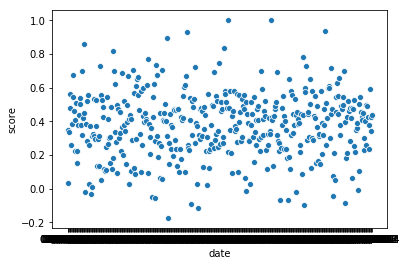

In [69]:
sns.scatterplot(x='date', y="score",data=df_res)

In [70]:
sns.regplot(x='date', y="score",data=df_res)

TypeError: Could not convert 01/01/201301/01/201501/04/201401/05/201301/05/201501/06/201301/07/201401/08/201501/09/201201/10/201301/10/201401/11/201301/12/201001/13/201401/13/201501/14/201201/14/201301/14/201401/15/201401/16/201101/16/201401/16/201501/19/201401/20/200501/20/201501/21/201101/21/201401/21/201501/22/201301/23/201401/23/201501/24/201301/24/201501/25/201501/26/201201/26/201501/27/201501/28/201401/29/201401/29/201501/30/201301/31/201201/31/201502/02/201502/03/201302/04/201502/05/201502/06/201402/07/201402/08/201102/08/201302/08/201402/08/201502/09/201302/09/201402/10/201302/10/201402/12/201402/13/201402/16/201502/17/201302/17/201502/18/200702/19/201402/19/201502/20/201402/20/201502/21/201402/21/201502/22/200802/22/201502/23/201302/23/201502/24/201002/25/201502/26/201202/26/201502/27/201302/28/201202/28/201502/29/200803/01/201303/01/201403/01/201503/03/201503/04/201403/05/201503/06/201403/07/201303/08/201403/09/201403/13/201403/13/201503/14/201303/14/201503/15/201403/15/201503/16/201403/16/201503/18/201003/18/201403/18/201503/19/201303/20/201103/22/201403/23/201503/24/201403/25/201303/26/201503/28/200703/29/201303/29/201403/31/201304/01/200704/01/201404/02/201504/03/201404/03/201504/06/201304/07/201404/07/201504/08/201304/09/201304/09/201404/10/201304/11/201404/12/201404/13/201404/14/201404/14/201504/16/201204/16/201504/18/201104/18/201304/18/201404/19/201104/19/201404/19/201504/20/201204/20/201304/21/201104/21/201504/22/201104/22/201504/23/201504/24/201104/25/201204/25/201404/25/201504/27/201304/27/201504/28/201504/29/200904/29/201304/30/201204/30/201304/30/201404/30/201505/02/201405/02/201505/03/201505/05/201205/06/201405/06/201505/07/201305/07/201505/08/201505/09/201305/11/201205/12/201305/12/201405/15/201305/15/201505/16/201505/17/200805/18/201205/19/201405/20/201505/21/200805/21/201205/22/201205/22/201305/22/201505/23/201405/25/201505/26/201305/27/201405/27/201505/29/201405/30/201405/30/201506/01/201306/01/201406/01/201506/02/201506/03/201206/03/201406/04/201106/04/201406/05/201106/05/201306/06/201406/06/201506/07/201306/07/201506/08/201206/08/201406/09/201306/09/201406/12/201406/14/201306/14/201506/17/201406/18/201206/18/201406/18/201506/19/201506/21/200406/21/201306/22/201206/24/201306/24/201506/25/200406/25/201406/25/201506/26/201306/27/201506/29/201506/30/201407/01/201307/01/201507/02/201007/02/201307/03/201307/03/201407/03/201507/04/201107/04/201307/04/201407/04/201507/06/201207/06/201307/06/201407/09/201407/10/201207/11/201207/11/201407/12/201107/12/201207/13/201407/14/201407/17/201507/18/201307/18/201507/21/201207/21/201407/23/201407/25/201007/25/201407/25/201507/27/201507/28/200707/28/201507/30/201207/30/201407/31/201208/01/201208/01/201408/02/201308/02/201408/03/201408/04/201308/04/201408/05/201308/05/201508/07/201408/07/201508/08/201208/09/201308/10/201208/12/201408/13/201408/13/201508/14/201408/15/201508/16/201408/17/201508/18/201508/19/201408/19/201508/20/201508/21/201208/21/201508/23/201108/24/201408/24/201508/25/201008/25/201208/25/201508/27/201508/28/201508/29/200708/29/201308/29/201408/30/201408/31/201308/31/201409/01/201109/01/201409/02/201309/04/201309/05/201309/05/201509/06/201509/07/201409/08/201209/08/201409/08/201509/10/200809/11/201209/11/201409/12/201409/13/201309/14/201209/14/201309/14/201409/16/201109/16/201409/18/201309/19/201109/19/201209/19/201309/21/201209/21/201309/22/201109/23/201409/25/201309/27/201410/02/201010/04/201010/04/201510/05/201010/07/201410/08/201310/12/200410/12/201210/13/200810/13/201410/15/201410/16/201110/16/201310/18/201410/19/201410/20/201210/22/201210/25/200810/25/201310/28/201310/30/201210/31/201411/01/201411/02/201411/02/201511/03/201311/03/201411/04/201511/05/201311/05/201511/07/201511/08/201511/09/201411/11/201211/11/201311/11/201411/12/201111/14/201311/16/200511/16/201211/17/201111/19/201311/20/200411/20/200911/20/201311/20/201411/21/201411/23/201411/24/200711/24/201011/24/201111/24/201311/24/201411/25/201311/26/201311/26/201411/27/201411/29/201311/30/201311/30/201412/01/201412/02/201412/03/201512/04/201412/05/201412/06/201312/08/201012/10/201312/12/201312/13/201312/17/201112/17/201312/18/200912/18/201312/18/201412/21/201212/21/201312/21/201412/22/201412/23/201112/23/201312/23/201412/24/201212/24/201312/25/201112/25/201412/26/201212/26/201312/26/201412/27/200712/27/201212/27/201312/28/201212/28/201312/30/201212/30/201412/31/2014 to numeric

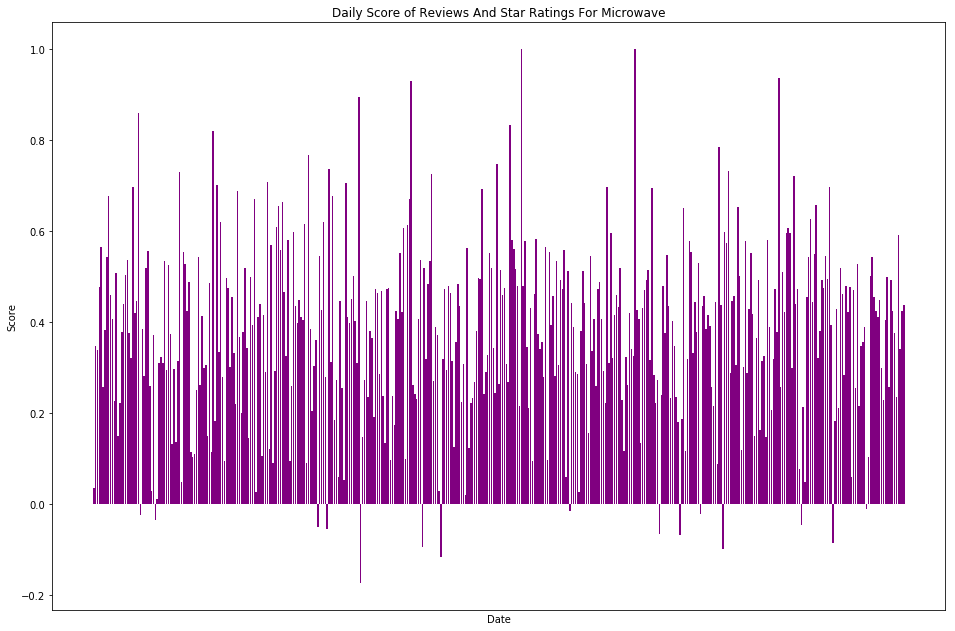

In [57]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(16, 12))

# Add x-axis and y-axis
ax.bar(df_res.index,
       df_res['score'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Score",
       title="Daily Score of Reviews And Star Ratings For Microwave")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
fig.autofmt_xdate()

plt.show()

In [71]:
import datetime
df_res['year'] = pd.DatetimeIndex(df_res['date']).year
df = df_res.groupby('year').agg(
    {'score': 'mean'}
)

In [72]:
df

,score
year,
2004,0.262997
2005,0.444217
2007,0.449415
2008,0.366873
2009,0.243073
2010,0.496431
2011,0.356456
2012,0.416084
2013,0.393099


In [78]:
df = df.reset_index()

Text(0.5, 1.0, 'Microwave')

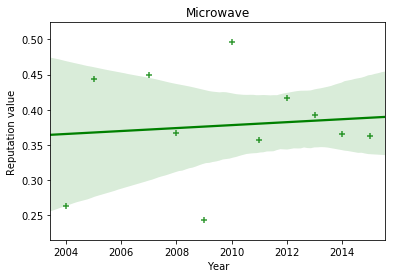

In [81]:
# plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='score', data=df, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Reputation value') # add x- and y-labels
ax.set_title('Microwave') # add title